# Smoothing Images
de 
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html

In [1]:
#init modules
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

#set basic vars
baseDir=os.path.join('..','..','ExamplesRepo')
#file name
baseFileNameList=('opencv_logo.jpg', 'cameraman.tif', 'eight.tif', 'circuit.tif', 'rose.png', 'sudoku-original.jpg')

In [2]:
#store the images in a dictionary
#using a comprehension solution 
imgDict={name: None for name in baseFileNameList}
for name in baseFileNameList:
    fileName=os.path.join(baseDir, name)
    imgDict[name] = cv2.imread(fileName, cv2.COLOR_RGB2BGR)   

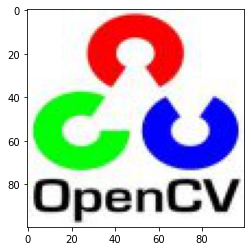

In [3]:
#use the dict as a switch-case
name=baseFileNameList[0]
img=imgDict[name]
#opencv is BGR we must change to RGB by hand
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [4]:
#esta fun muestra dos imagenes y devuelve los handles a los ejes para luego poder usarlos con un plot o un scatter
#sacado de https://python4astronomers.github.io/plotting/advanced.html
def disp2img(img1, img2, figSize=(5,5), img2Title="Filtered"):
    fig=plt.figure(figsize=figSize) # create a figure object
    
    
    axis1 = fig.add_subplot(1, 2, 1)  # create 1st sub axes object in the figure 
    axis1.imshow(img1)
    axis1.set_xticks([]), axis1.set_yticks([])
    axis1.set_title("Original", fontsize='large')
          
    axis2= fig.add_subplot(1, 2, 2)  # create 2nd sub axes object in the figure
    axis2.imshow(img2)
    axis2.set_xticks([]), axis2.set_yticks([])   
    axis2.set_title(img2Title, fontsize='large')
    
    
    return axis1, axis2;

<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/math/220e403e44b16ea8e05d350c4ce69e9aedff5bd1.png">

(<AxesSubplot:title={'center':'Original'}>,
 <AxesSubplot:title={'center':'Filtered'}>)

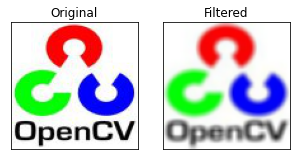

In [5]:
kernel = np.ones((5,5),np.float32)/25
#ddepth: desired depth of the output image. If it is negative, it will be the same as that of the input image.
ddepth=-1
imgnew = cv2.filter2D(img,ddepth,kernel)
disp2img(img, imgnew)

# Image Blurring (Image Smoothing)

<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/math/42f61cdcb41615a23af32b0fd95e674090afdc8d.png">

(<AxesSubplot:title={'center':'Original'}>,
 <AxesSubplot:title={'center':'Blurr'}>)

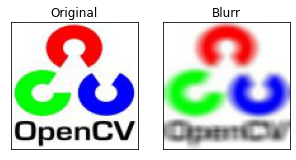

In [6]:
NRB, NCB=(5,10)
imgnew = cv2.blur(img,(NCB,NRB))
disp2img(img, imgnew, img2Title="Blurr")

(<AxesSubplot:title={'center':'Original'}>,
 <AxesSubplot:title={'center':'Blurr'}>)

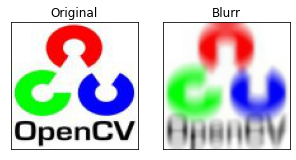

In [7]:
NRB, NCB=(15,15)
sx, sy=(1,15)
dst=None
imgnew = cv2.GaussianBlur(img,(NRB,NCB),sx, dst, sy)
disp2img(img, imgnew, img2Title="Blurr")

# filter noise

Parameters
----------
image : ndarray
    Input image data. Will be converted to float.
mode : str
    One of the following strings, selecting the type of noise to add:

    'gauss'     Gaussian-distributed additive noise.
    'poisson'   Poisson-distributed noise generated from the data.
    's&p'       Replaces random pixels with 0 or 1.
    'speckle'   Multiplicative noise using out = image + n*image,where
                n is uniform noise with specified mean & variance.


In [8]:
def addNoise(noise_typ,image, var=0.1, amount=0.004, spLevel=1):
    if noise_typ == "gauss":
          row,col,ch= image.shape
          mean = 0
          #var = 0.1
          sigma = var**0.5
          gauss = np.random.normal(mean,sigma,(row,col,ch))
          gauss = gauss.reshape(row,col,ch)
          noisy = image + gauss
          return noisy
    elif noise_typ == "s&p":
          row,col,ch = image.shape
          s_vs_p = 0.5
          #amount = 0.004
          out = np.copy(image)
          # Salt mode
          num_salt = np.ceil(amount * image.size * s_vs_p)
          coords = [np.random.randint(0, i - 1, int(num_salt))
                  for i in image.shape]
          out[tuple(coords)] = 1

          # Pepper mode
          num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
          coords = [np.random.randint(0, i - 1, int(num_pepper))
                  for i in image.shape]
          out[tuple(coords)] = 0
          return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
          row,col,ch = image.shape
          gauss = spLevel*np.random.randn(row,col,ch)
          gauss = gauss.reshape(row,col,ch)        
          noisy = image + image * gauss
          return noisy

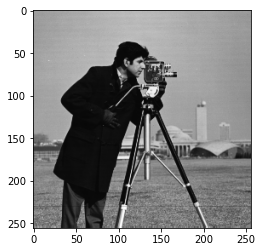

In [9]:
#use the dict as a switch-case
name=baseFileNameList[1]
img=imgDict[name]
img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
plt.imshow(img)

(<AxesSubplot:title={'center':'Original'}>,
 <AxesSubplot:title={'center':'Noisy'}>)

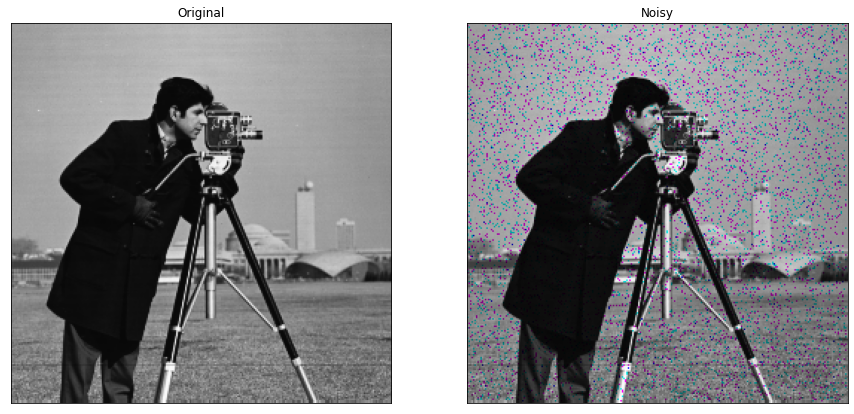

In [10]:
#addNoise changes img to float, we need to normalize [0 1] for imshow
var=550 # para "gauss"
amount=0.04 #para 's&p'
spLevel=0.1 #para spekle
imgnoise=addNoise("s&p", img, var, amount, spLevel)
disp2img(img, imgnoise/255, figSize=(15,15), img2Title="Noisy")

## Median Filtering

(<AxesSubplot:title={'center':'Original'}>,
 <AxesSubplot:title={'center':'Filtered'}>)

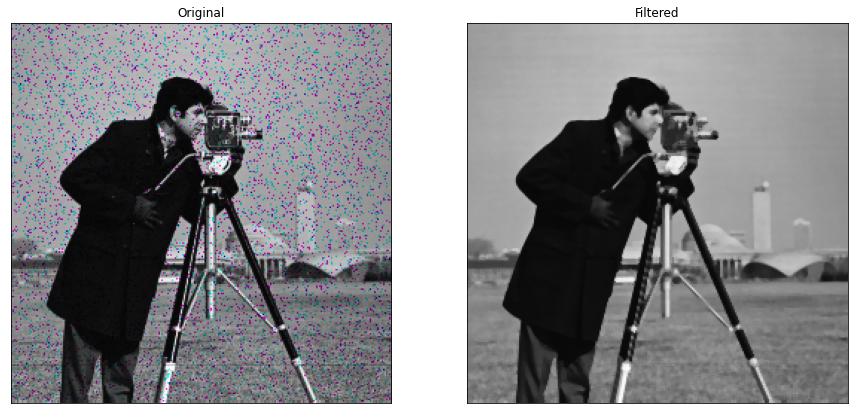

In [70]:
N=3
imgnew = cv2.medianBlur(img,N)
disp2img(imgnoise, imgnew, figSize=(15,15), img2Title="Filtered")

## Bilateral Filtering
The bilateral filter also uses a Gaussian filter in the space domain, but it also uses one more (multiplicative) Gaussian filter component which is a function of pixel intensity differences. The Gaussian function of space makes sure that only pixels are ‘spatial neighbors’ are considered for filtering, while the Gaussian component applied in the intensity domain (a Gaussian function of intensity differences) ensures that only those pixels with intensities similar to that of the central pixel (‘intensity neighbors’) are included to compute the blurred intensity value. As a result, this method preserves edges, since for pixels lying near edges, neighboring pixels placed on the other side of the edge, and therefore exhibiting large intensity variations when compared to the central pixel, will not be included for blurring.
ver https://www.geeksforgeeks.org/python-bilateral-filtering/
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190825010814/Untitled-Diagram-138.png">

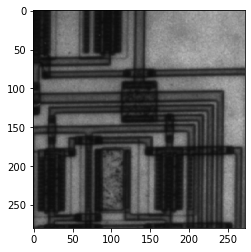

In [73]:
#use the dict as a switch-case
name=baseFileNameList[3]
img=imgDict[name]
img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


254.99998
-3.3318279e-06


(<AxesSubplot:title={'center':'Original'}>,
 <AxesSubplot:title={'center':'Noisy'}>)

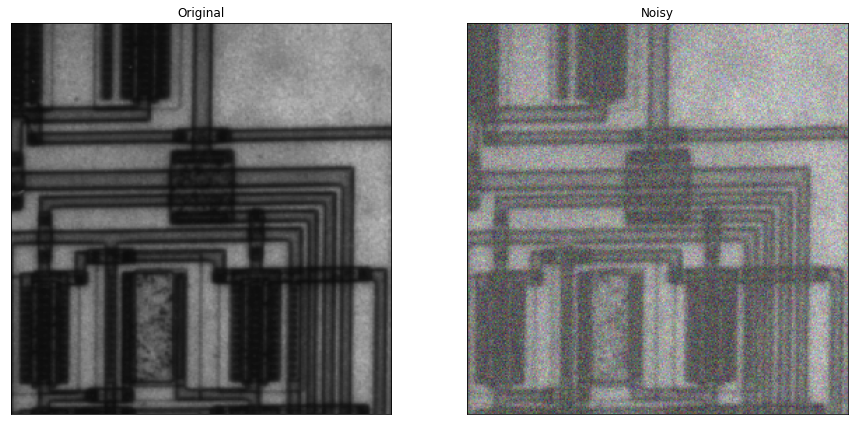

In [74]:
#addNoise changes img to float, we need to normalize [0 1] for imshow
var=850 # para "gauss"
amount=0.04 #para 's&p'
spLevel=0.1 #para spekle
imgnoise=addNoise("gauss", img, var, amount, spLevel)
#bilateral filter need 8u or 32f
imgnoise=cv2.normalize(imgnoise,None,0,255,norm_type=cv2.NORM_MINMAX,dtype=cv2.CV_32F)
print(imgnoise.max())
print(imgnoise.min())
disp2img(img, imgnoise/255, figSize=(15,15), img2Title="Noisy")


    d: Diameter of each pixel neighborhood.
    sigmaColor: Value of \sigma in the color space. The greater the value, the colors farther to each other will start to get mixed.
    sigmaSpace: Value of \sigma in the coordinate space. The greater its value, the more further pixels will mix together, given that their colors lie within the sigmaColor range.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


254.99998
-3.3318279e-06


(<AxesSubplot:title={'center':'Original'}>,
 <AxesSubplot:title={'center':'Filtered'}>)

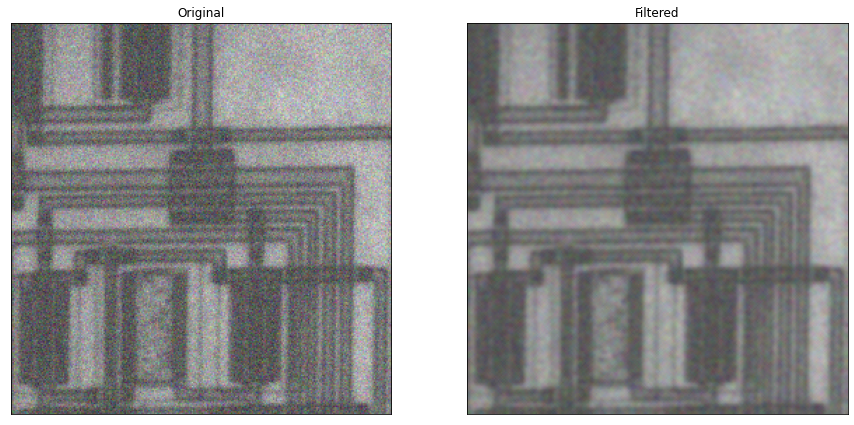

In [75]:
#filter
print(imgnoise.max())
print(imgnoise.min())
d=5
sigmaColor=25
sigmaSpace=25
imgnew = cv2.bilateralFilter(imgnoise/255,d,sigmaColor,sigmaSpace)
disp2img(imgnoise/255, imgnew, figSize=(15,15), img2Title="Filtered")